In [2]:
# Final Project
"""
# Inspect: 
.head()
.tail()
.describe()
.info()

Cleaning: (finding from inspection)
removing NA
Drop columns
convert % value


Analyzing: Answering Hypothesis:

->Are the best rated chocolates are mostly from a specific region (bean origin)? #bar
->Is there an association between ratings and cocoa %? #line
->What percentage of Cocoa is most enjoyed # same as Q2, but plot pie chart!!
->Does the date of review effect the rating of the chocolate bar? #line
->Do the companies have a favorite ingredient combination, or are their recipes random? # bar
->What company consistently produces the best chocolate # bar
->Does the orgin of the cacao bean have a correlation to the country its sold in? # correlation heatmap


# graphs
(Bonus)Modeling:Machine learning 


-----------------------------------------------------------------------------------------------------------
********************************THURSDAY*******************************
# First: summarize your findings in more lines (aim for 2 lines at least if possible)
# Second: Add title, y-axis, and x-axis names to chart.
# Create Streamlit app fully functional before break if possible

# After break, deploy our app by 2pm and make presentation for friday(2pm-2:40pm)
#If done early, I will show you some machine learning!!

# OPTIONAL (at the end): Try to tidy up the code by removing unwanted cell, and adding comments!!




"""

'\n# Inspect: \n.head()\n.tail()\n.describe()\n.info()\n\nCleaning:# removing NA\n\n\nAnalyzing: Hypothesis\n# graphs \n(Bonus)Modeling:Machine learning \n\n\n'

In [3]:
import pandas as pd

In [4]:
import plotly.express as px

In [5]:
import plotly.figure_factory as ff

<span style='font-size:xx-large'>**Inspection:** </span>


In [6]:
chocolate_df = pd.read_csv("Chocolate bar ratings 2022.csv")

In [7]:
chocolate_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [8]:
chocolate_df.tail()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
2583,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2584,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2586,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25
2587,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50


In [9]:
chocolate_df.describe()

,REF,Review Date,Rating
count,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,3.198319
std,773.852201,4.082722,0.444069
min,5.000000,2006.000000,1.000000
25%,820.000000,2012.000000,3.000000
50%,1470.000000,2015.000000,3.250000
75%,2122.000000,2018.000000,3.500000
max,2768.000000,2022.000000,4.000000


In [10]:
chocolate_df.columns

Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')

In [11]:
chocolate_df.isna().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [12]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   object 
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 202.3+ KB


In [13]:
chocolate_df.shape

(2588, 10)

# cleaning:

drops

change type of cocoa percent to float


remove rows with null ingredient 


In [14]:
column_to_drop = ['REF']
chocolate_df.drop(column_to_drop, axis = 1, inplace = True)

In [15]:
chocolate_df.dropna(inplace=True)
chocolate_df.reset_index(drop=True, inplace=True)
chocolate_df.shape

(2501, 9)

In [16]:
chocolate_df['Cocoa Percent']=chocolate_df['Cocoa Percent'].str.replace('%','').astype(float)

In [17]:
chocolate_df.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
2,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
3,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [18]:
chocolate_df.describe()

,Review Date,Cocoa Percent,Rating
count,2501.000000,2501.000000,2501.000000
mean,2014.660136,71.472411,3.211815
std,4.071615,5.122815,0.427366
min,2006.000000,42.000000,1.000000
25%,2012.000000,70.000000,3.000000
50%,2015.000000,70.000000,3.250000
75%,2018.000000,74.000000,3.500000
max,2022.000000,100.000000,4.000000


In [19]:
chocolate_df.isna().sum()

Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

<span style='font-size:xx-large'>**Team 1**</span>

\-&gt;Are the best rated chocolates are mostly from a specific region \(bean origin\)? <u>\#bar</u>

\-&gt;Is there an association between ratings and cocoa %? <u>\#line</u>

\-&gt;What percentage of Cocoa is most enjoyed \# same as Q2, but plot <u>pie chart!!</u>



In [20]:
#->Is there an association between ratings and cocoa %? (Line)

In [21]:
def company_fav_ingredient(df):
    company_ing = pd.DataFrame()
    for i in df['Ingredients'].unique().tolist():

        column = df[df["Ingredients"] == i]

        column = column.groupby('Company (Manufacturer)')['Company (Manufacturer)'].count().sort_values(ascending=False)
        column = column[:3]
        #company_ing[i] = column.values
        t = {}
        t[i] = column
        company_ing = pd.concat([company_ing, pd.DataFrame.from_records([column])])
    return company_ing

In [22]:
chocolate_df['Rating'].unique().shape


(12,)

In [23]:
def rating(data):
    tempdf = data
    finaldf = pd.DataFrame()
    for i in tempdf['Rating'].unique().tolist():
        column = tempdf[tempdf['Rating'] == i]
        cocoamean = column["Cocoa Percent"].mean()
        data1 = {
            "Cocoa %": [cocoamean],
            "Rating": [i]
                }
        if cocoamean >=0:
            finaldf = pd.concat([finaldf,pd.DataFrame.from_records(data1)],ignore_index=True)
    return finaldf

In [24]:
table = rating(chocolate_df)
table.head()

,Cocoa %,Rating
0,71.406048,3.25
1,71.078073,3.75
2,71.214536,3.50
3,71.694391,3.00
4,71.840491,2.75


In [25]:
table = table.sort_values("Rating")
table

,Cocoa %,Rating
11,73.000000,1.00
10,75.600000,1.50
7,72.000000,1.75
9,73.689655,2.00
8,72.928571,2.25
6,71.694969,2.50
4,71.840491,2.75
3,71.694391,3.00
0,71.406048,3.25
2,71.214536,3.50


In [26]:
import plotly.express as px
import numpy as np

In [27]:
fig = px.line(table, x= 'Rating',y='Cocoa %')
fig.show()

In [28]:
#As the rating of the chocolate goes up, on average, the percentage of cocoa used in the chocolate decreases.

In [29]:
#->What percentage of Cocoa is most enjoyed # (Pie chart)
#wedge sizes: max value of rating (array)
#labels: cocoa % (list)

In [30]:
chocolate_df['Rating'].unique()

array([3.25, 3.75, 3.5 , 3.  , 2.75, 4.  , 2.5 , 1.75, 2.25, 2.  , 1.5 ,
       1.  ])

In [31]:
toprating = chocolate_df[chocolate_df['Rating'] == 4.]
toprating

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
16,A. Morin,France,2013,Venezuela,Chuao,70.0,"4- B,S,C,L","oily, nut, caramel, raspberry",4.0
19,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,"3- B,S,C","sweet, cocoa, tangerine",4.0
24,A. Morin,France,2014,Peru,Pablino,70.0,"4- B,S,C,L","delicate, hazelnut, brownie",4.0
32,A. Morin,France,2021,Mexico,La Joya,70.0,"4- B,S,C,L","light color, fruit, yogurt",4.0
81,Amano,U.S.A.,2010,Ecuador,Guayas,70.0,"4- B,S,C,V","strong spice, intense pepper",4.0
...,...,...,...,...,...,...,...,...,...
2371,Valrhona,France,2012,Venezuela,"Otucan, Grand Cru",69.0,"5- B,S,C,V,L","green,unripened fruit,banana",4.0
2374,Valrhona,France,2015,Peru,"Piura, Illanka, Quemazon",63.0,"5- B,S,C,V,L","intense, dark berry, grapes",4.0
2416,White Label aka Mutari,U.S.A.,2022,Ecuador,"Costa Esmeraldas, CEconche77121620121820",77.0,"3- B,S,C","complex, hazelnut, dairy, fruit",4.0
2430,Willie's Cacao,U.K.,2016,Colombia,Los Llanos,70.0,"3- B,S,C","rich cocoa, spicy, cinamon",4.0


In [32]:
table.head()

,Cocoa %,Rating
11,73.000000,1.00
10,75.600000,1.50
7,72.000000,1.75
9,73.689655,2.00
8,72.928571,2.25


In [33]:
fig = px.pie(table, values= 'Rating',names = 'Cocoa %')
fig.show()

In [34]:
"""

"""

'\n\n'

# Team 2



\-&gt;\*\*\*Does the date of review effect the rating of the chocolate bar? #line
\-&gt;\*\*\*Do the companies have a favorite ingredient combination, or are their recipes random? \# bar
\-&gt;\*\*\*What company consistently produces the best chocolate \# bar



<AxesSubplot: xlabel='Year of Review'>

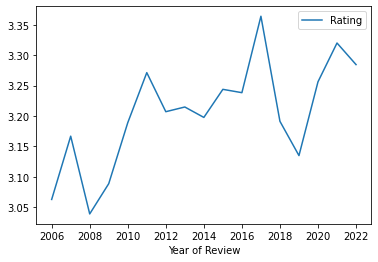

In [35]:
ratingsByYear = []
years = range(2006,2023)
for i in years:
    tempdf = chocolate_df[chocolate_df['Review Date']==i]
    ratingsByYear.append(tempdf['Rating'].mean())
data= list(zip(years,ratingsByYear))
myDF = pd.DataFrame(data, columns=['Year of Review','Rating'])
myDF.plot.line('Year of Review','Rating')

In [36]:
px.line(myDF, x = 'Year of Review', y = 'Rating', template = 'plotly_dark', title = 'Average Rating by Year')

In [37]:
chocolate_df.groupby('Rating')['Rating'].count().sort_values(ascending = False)

Rating
3.50    571
3.00    517
3.25    463
2.75    326
3.75    301
2.50    159
4.00    114
2.00     29
2.25     14
1.50      5
1.00      1
1.75      1
Name: Rating, dtype: int64

In [38]:
chocolate_df['Company (Manufacturer)'].unique().shape

(555,)

In [39]:
chocolate_df['Rating'].unique().shape

(12,)

In [40]:
def rc(data):   
    ratingComp = pd.DataFrame()
    for i in data['Rating'].unique().tolist():
        column = data[data['Rating'] == i]
        column = column.groupby('Company (Manufacturer)')['Company (Manufacturer)'].count().sort_values(ascending = False)
        column = column[:2]
        t = {}
        t[i] = column
        ratingComp= pd.concat([ratingComp, pd.DataFrame.from_records([column])])
    return ratingComp


In [41]:
df_rc = rc(chocolate_df)
l = chocolate_df['Rating'].unique().tolist()
df_rc['Rating'] = l

fig = px.bar(df_rc, x = df_rc["Rating"], y = df_rc.columns.tolist(), template = 'plotly_dark', title = 'Ratings by Company')
fig.show()

Company Fav Ingredient

\*Do the companies have a favorite ingredient combination, or are their recipes random? \# bar



In [42]:
chocolate_df.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
2,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
3,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [43]:
chocolate_df.describe()

,Review Date,Cocoa Percent,Rating
count,2501.000000,2501.000000,2501.000000
mean,2014.660136,71.472411,3.211815
std,4.071615,5.122815,0.427366
min,2006.000000,42.000000,1.000000
25%,2012.000000,70.000000,3.000000
50%,2015.000000,70.000000,3.250000
75%,2018.000000,74.000000,3.500000
max,2022.000000,100.000000,4.000000


In [44]:
chocolate_df.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')

In [45]:
chocolate_df['Company (Manufacturer)'].unique().shape

(555,)

In [46]:
chocolate_df['Ingredients'].unique().shape

(21,)

In [47]:
def company_fav_ingredient(df):
    company_ing = pd.DataFrame()
    for i in df['Ingredients'].unique().tolist():

        column = df[df["Ingredients"] == i]

        column = column.groupby('Company (Manufacturer)')['Company (Manufacturer)'].count().sort_values(ascending=False)
        column = column[:3]
        #company_ing[i] = column.values
        t = {}
        t[i] = column
        company_ing = pd.concat([company_ing, pd.DataFrame.from_records([column])])
    return company_ing

In [48]:
df_cfi = company_fav_ingredient(chocolate_df)
l = chocolate_df['Ingredients'].unique().tolist()
df_cfi["Ingredients"] = l

fig = px.bar(df_cfi, x = df_cfi["Ingredients"], y = df_cfi.columns.tolist())
fig.show()

In [49]:
column = chocolate_df[chocolate_df['Ingredients'] == '3- B,S,C']
column

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
2,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
3,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50
...,...,...,...,...,...,...,...,...,...
2478,Zoto (Chocolatoa),Belgium,2018,Nicaragua,Rugoso,75.0,"3- B,S,C","sandy, basic cocoa",3.25
2497,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2498,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00
2499,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


# Correlation Heatmap



In [50]:
chocolate_df.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')

In [58]:
tempdf = chocolate_df.copy()
tempdf.drop(['Company (Manufacturer)', 'Company Location', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name','Ingredients', 'Most Memorable Characteristics'], axis =1, inplace = True)

chocolate_df_corr = tempdf.corr() # Generate correlation matrix
x = list(chocolate_df_corr.columns)
y = list(chocolate_df_corr.index)
z = np.array(chocolate_df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Brwnyl',
    showscale=True,
    )
fig.update_xaxes(side="bottom")
fig.update_layout(
    # title_text='Heatmap', 
    title_x=0.5, 
    width=500, 
    height=500,
    yaxis_autorange='reversed',
    template='plotly_dark'
)
fig.show()

In [59]:
df_temp = chocolate_df.copy()
df_temp['Country of Bean Origin']=df_temp['Country of Bean Origin'].astype('category').cat.codes
df_temp['Company Location']=df_temp['Company Location'].astype('category').cat.codes

df_temp.drop(['Company (Manufacturer)', 'Specific Bean Origin or Bar Name','Ingredients', 'Most Memorable Characteristics'], axis =1, inplace = True)

chocolate_df_corr = df_temp.corr() # Generate correlation matrix
x = list(chocolate_df_corr.columns)
y = list(chocolate_df_corr.index)
z = np.array(chocolate_df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Brwnyl',
    showscale=True,
    )
fig.update_xaxes(side="bottom")
fig.update_layout(
    # title_text='Heatmap', 
    title_x=0.5, 
    width=500, 
    height=500,
    yaxis_autorange='reversed',
    template='plotly_dark'
)
fig.show()

In [0]:
chocolate_df.head()

<span style='font-size:xx-large'>Analysis</span>


# <span style='font-size:x-large'>Team 1: </span>



In [0]:
"""

Hypothesis 1: Is there an association between ratings and cocoa %?
 - On average, as the rating of the chocolate goes up, the percentage of cocoa used in the chocolate decreases.

"""

In [0]:
#Hypothesis 2: What percentage of Cocoa is most enjoyed? Answer: 70.76%


## Team 2



In [0]:
"""
Hypothesis 3: Does the date of review effect the rating of the chocolate bar?

"""

In [0]:
"""
Hypothesis 4: What company consistently produces the best chocolate?
    - We can consider the best chocolate to be ranked 3.25 or above. Based on the Bar Chart titled Ratings by Company, Soma is the only company that is consistent within the ratings of 3.25 - 4. Making Soma the most consitent producer of the best chocolate

"""